In [2]:
import pandas as pd
import requests

In [5]:
response = requests.get('https://api.stlouisfed.org/fred/series?series_id=GNPCA&api_key=81a71e264d91e3f97c13fb1e430133b3&file_type=json')

In [6]:
response.text

'{"realtime_start":"2024-09-12","realtime_end":"2024-09-12","seriess":[{"id":"GNPCA","realtime_start":"2024-09-12","realtime_end":"2024-09-12","title":"Real Gross National Product","observation_start":"1929-01-01","observation_end":"2023-01-01","frequency":"Annual","frequency_short":"A","units":"Billions of Chained 2017 Dollars","units_short":"Bil. of Chn. 2017 $","seasonal_adjustment":"Not Seasonally Adjusted","seasonal_adjustment_short":"NSA","last_updated":"2024-03-28 07:55:11-05","popularity":15,"notes":"BEA Account Code: A001RX\\n\\n"}]}'

In [19]:
api_key='81a71e264d91e3f97c13fb1e430133b3'

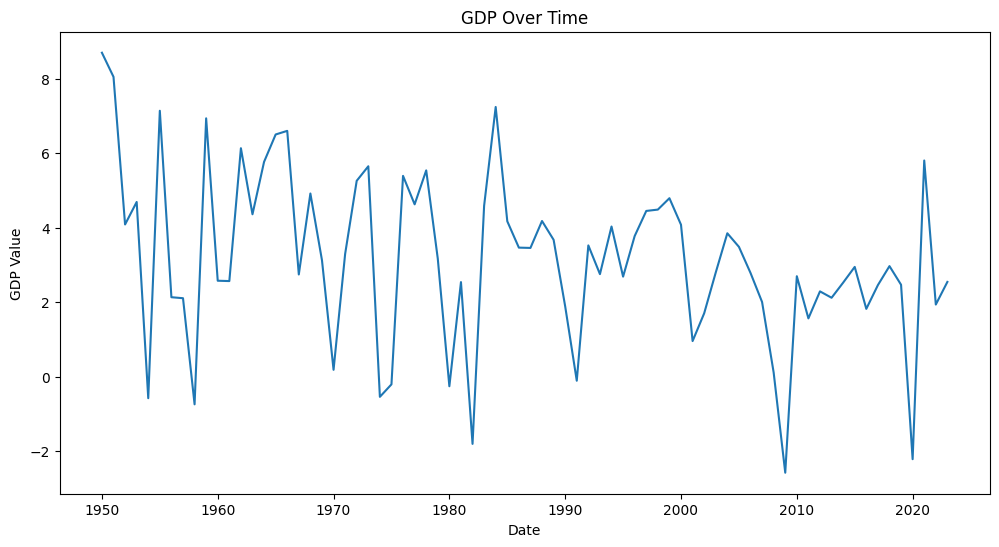

In [35]:
import matplotlib.pyplot as plt

params = {
    'series_id': 'GDPCA',
    'api_key': api_key,
    'observation_start': '1950-01-01',
    'obsercation_end': '2023-12-31',
    'file_type': 'json',
    'units': 'pch'
}


url = 'https://api.stlouisfed.org/fred/series/observations'
response = requests.get(url, params)

df = pd.DataFrame(response.json()['observations'])
df.head()

df['date'] = pd.to_datetime(df['date'])
df['value'] = pd.to_numeric(df['value'])

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['value'])
plt.title('GDP Over Time')
plt.xlabel('Date')
plt.ylabel('GDP Value')
plt.show()

In [36]:
stocks_api_key = 'TBAUBBJJJ79E4XM1'

In [51]:
url = 'https://www.alphavantage.co/query'

params = {
    'function': 'TIME_SERIES_DAILY',
    'symbol': 'TSLA',
    'apikey':stocks_api_key
}

response = requests.get(url, params)

df = pd.DataFrame(response.json()['Time Series (Daily)'])
df_transposed = df.T
df_transposed.head()

,1. open,2. high,3. low,4. close,5. volume
2024-09-24,254.0800,257.1900,249.0501,254.2700,86571434
2024-09-23,242.6100,250.0000,241.9200,250.0000,86927194
2024-09-20,241.5200,243.9900,235.9200,238.2500,99879070
2024-09-19,234.0000,244.2400,232.1300,243.9200,102694576
2024-09-18,230.0900,235.6800,226.8800,227.2000,78010204


In [52]:
df_transposed = df_transposed.reset_index()
df_transposed.set_index('index', inplace=True)
df_transposed.index = pd.to_datetime(df_transposed.index)
df_transposed.sort_index(inplace=True)

In [54]:
df_transposed.head()

,1. open,2. high,3. low,4. close,5. volume
index,,,,,
2024-05-02,182.8600,184.6000,176.0200,180.0100,89148041
2024-05-03,182.1000,184.7800,178.4200,181.1900,75491539
2024-05-06,183.8000,187.5600,182.2000,184.7600,84390253
2024-05-07,182.4000,183.2600,177.4000,177.8100,75045854
2024-05-08,171.5900,176.0600,170.1500,174.7200,79969488
